
#                                                                       **AIR QUALITY DYNAMICS**


**Aim of the Project :** The aim of this project is to analyze air quality data using exploratory data analysis techniques to identify seasonal, monthly, and hourly pollution patterns, detect high-risk periods, and derive insights that can support effective air quality monitoring and control strategies.

# **Phase - 1**

## **Dataset Overview**

**Domain :** UCI Machine Learning Repository

**Problem statement :** Air pollution levels vary significantly over time due to factors such as seasonal changes, traffic activity, and atmospheric conditions. However, relying only on average pollution values often fails to capture temporal variability and extreme pollution events, leading to ineffective monitoring and policy decisions. This project addresses the need to analyze air quality data across different time scales to better understand pollution dynamics and identify critical periods that pose higher health risks.

**Dataset :** Air Quality Dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

# **Phase - 2**

## **1. Data Loading & Initial Overview**

In [80]:
import pandas as pd
import numpy as np

**The above code is used to import the necessary libraries to load and pre-processing the dataset.**

In [81]:
path="D:\Documents\Data Analytics\Main Project DA\AirQualityUCI.csv"
df=pd.read_csv(path,delimiter=';',decimal=',',na_values='-200')
print(df)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

**The above code is used to read the csv file delimited wit ' ; ' from windows path and replace ' , ' with ' . ' for incorrectly entered decimal values. Also pandas will replace every occurrence of -200 in the CSV with NaN**

In [82]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  9471
Number of Columns:  17


**The above code is used to show the total number of rows and columns.**

In [83]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

**The above attribute shows the datatypes of each columns.**

In [84]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


**The above attribute show the first few rows of the dataset.**

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


**The above attribute shows the concise summary of a DataFrame.**

In [86]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


**The above attribute generate a statistical summary of a DataFrame or Series.**


## **2. Data Pre-Processing**


In [87]:
print(df.isnull().sum())

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


**The above code is used to check for missing values in each columns.**

In [88]:
df=df.dropna(how='all').dropna(axis=1,how='all')

**The above code is used to delete full empty rows and columns together.**

In [115]:
df['CO(GT)']=df['CO(GT)'].fillna(df['CO(GT)'].mean().round(2))
df['PT08.S1(CO)']=df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].median())
df['NMHC(GT)']=df['NMHC(GT)'].fillna(df['NMHC(GT)'].median())
df['C6H6(GT)']=df['C6H6(GT)'].fillna(df['C6H6(GT)'].mean())
df['PT08.S2(NMHC)']=df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].mean())
df['NOx(GT)']=df['NOx(GT)'].fillna(df['NOx(GT)'].median())
df['PT08.S3(NOx)']=df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].mean())
df['NO2(GT)']=df['NO2(GT)'].fillna(df['NO2(GT)'].mean())
df['PT08.S4(NO2)']=df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].median())
df['PT08.S5(O3)']=df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].mean())
df['T']=df['T'].fillna(df['T'].mean())
df['RH']=df['RH'].fillna(df['RH'].mean())
df['AH']=df['AH'].fillna(df['AH'].median())

**The above codes imputes the missing values in each columns using mean and median.**

In [90]:
print(df.duplicated().sum())

0


**The above code is used to check for duplicate entries.**

In [91]:
df=df.drop_duplicates()

**The above code is used to delete the duplicate entries.**

In [92]:
df['Datetime']=pd.to_datetime(df['Date']+' '+df['Time'],format='%d/%m/%Y %H.%M.%S')
df=df.drop(columns=['Date','Time'])

**The code above concatenates 'Date' and 'Time' columns into a single column called 'Datetime' and converted to datetime datatype, also the original columns are deleted.**

In [93]:
conditions=[(df['CO(GT)']<=1.0),(df['CO(GT)']>1.0)&(df['CO(GT)']<=5.0),(df['CO(GT)']>5.0)&(df['CO(GT)']<=10.0),(df['CO(GT)']>10.0)]
categories=['Low Risk','Moderate Risk','High Risk','Very High Risk']
df['AQI_Category']=np.select(conditions,categories,default='Unknown')

In [94]:
df['NOx_NO2_Ratio']=df['NOx(GT)']/df['NO2(GT)']

**The above codes creates 2 new columns, one shows the AQI category based on CO(GT) column andthe second one shows the NOx_NO2 ratio.**

In [95]:
risk_categories=['High Risk','Very High Risk']
df_high_risk=df[df['AQI_Category'].isin(risk_categories)].copy()
df_high_risk

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,AQI_Category,NOx_NO2_Ratio
25,6.9,1776.0,461.0,27.4,1488.0,383.0,702.0,172.0,2333.0,1704.0,9.7,69.3,0.8319,2004-03-11 19:00:00,High Risk,2.226744
26,6.1,1640.0,401.0,24.0,1404.0,351.0,743.0,165.0,2191.0,1654.0,9.6,67.8,0.8133,2004-03-11 20:00:00,High Risk,2.127273
50,6.6,1843.0,488.0,32.6,1610.0,340.0,624.0,170.0,2390.0,1887.0,12.9,50.5,0.7478,2004-03-12 20:00:00,High Risk,2.000000
53,5.4,1677.0,367.0,21.8,1346.0,300.0,741.0,134.0,2062.0,1657.0,9.7,64.6,0.7771,2004-03-12 23:00:00,High Risk,2.238806
98,5.9,1898.0,341.0,23.1,1381.0,325.0,681.0,173.0,2103.0,1905.0,17.6,46.1,0.9210,2004-03-14 20:00:00,High Risk,1.878613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,5.9,1726.0,150.0,30.8,1570.0,659.0,359.0,200.0,2021.0,1947.0,20.1,43.2,1.0051,2005-03-24 19:00:00,High Risk,3.295000
9098,7.5,1818.0,150.0,35.5,1675.0,847.0,330.0,232.0,2143.0,2129.0,18.8,49.1,1.0538,2005-03-24 20:00:00,High Risk,3.650862
9121,5.7,1673.0,150.0,27.2,1484.0,649.0,397.0,196.0,2008.0,1812.0,19.4,56.3,1.2500,2005-03-25 19:00:00,High Risk,3.311224
9122,5.5,1605.0,150.0,23.7,1397.0,604.0,420.0,189.0,1891.0,1710.0,18.8,58.3,1.2514,2005-03-25 20:00:00,High Risk,3.195767


**The above code filters the data by 'High' and 'Very High' risk categories.**

In [96]:
max_co=df['CO(GT)'].max()
avg_c6h6=df['C6H6(GT)'].mean()
count_incidents=len(df_high_risk)
print("Maximum CO Concentration: ",max_co)
print("Average C6H6 concentration: ",avg_c6h6)
print("Count of Critical Incidents: ",count_incidents)

Maximum CO Concentration:  11.9
Average C6H6 concentration:  10.083105327549774
Count of Critical Incidents:  344


**The above codes is used to show aggregations like Maximum CO Concentration,Average C6H6 concentration and Count of Critical Incidents**

# **Phase - 3**

## **Exploratory Data Analysis (EDA) & Visualizations**

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

**The code above is used to import the necessary libraries for visualization of the cleaned dataset.**

In [99]:
df.index=pd.to_datetime(df.index)
df['Hour']=df.index.hour
df['Month']=df.index.month
df['DayOfWeek']=df.index.day_name()

**The above variables are additional temporal features for EDA.**

### **DESCRIPTIVE ANALYSIS**

In [100]:
print('--- Descriptive Statistics Summary ---')
print(df[['CO(GT)','NO2(GT)','C6H6(GT)','T','RH']].describe())

--- Descriptive Statistics Summary ---
            CO(GT)      NO2(GT)     C6H6(GT)            T           RH
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000
mean      2.152255   113.091251    10.083105    18.317829    49.234201
std       1.316069    43.920954     7.302650     8.657639    16.974801
min       0.100000     2.000000     0.100000    -1.900000     9.200000
25%       1.200000    86.000000     4.600000    12.000000    36.600000
50%       2.150000   113.091251     8.600000    18.300000    49.234201
75%       2.600000   133.000000    13.600000    24.100000    61.900000
max      11.900000   340.000000    63.700000    44.600000    88.700000


**The print statement above shows the descriptive statistics using the describe() attribute of the data.**

**Key Finding: The average CO level is 2.13 mg/m³, but the maximum reaches 11.9, indicating significant "Very High Risk" spikes in air pollution.**

### **UNIVARIATE ANALYSIS**

#### The **Histogram** below shows the pollution distribution analysis of Carbon Monoxide emissions from a gas turbine.

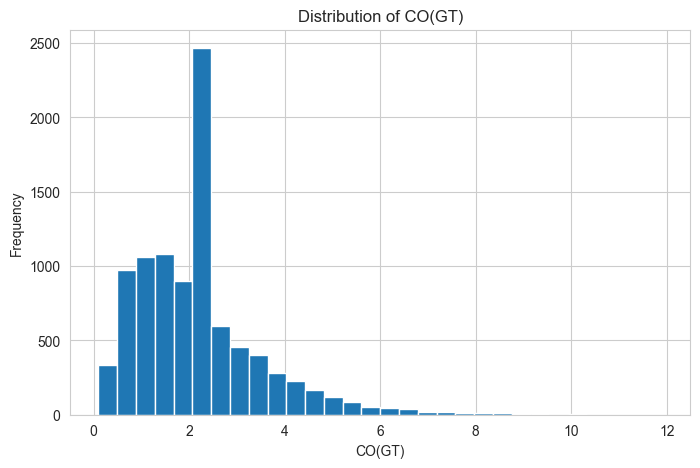

In [101]:
plt.figure(figsize=(8,5))
plt.hist(df['CO(GT)'], bins=30)
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.title('Distribution of CO(GT)')
plt.show()

### Pollution Distribution Analysis
The data exhibits a **right-skewed (positively skewed)** distribution.

* **Core Trend:** The majority of readings reflect baseline air quality levels.
* **Anomalies:** There are distinct, occasional **high pollution events** that create a long tail on the right side of the histogram.
* **Implication:** The mean is likely higher than the median due to these extreme values, suggesting that average pollution levels are being driven up by periodic spikes rather than a consistent baseline increase.

#### The **Bar Plot** below shows seasonal variations in carbon monoxide levels.

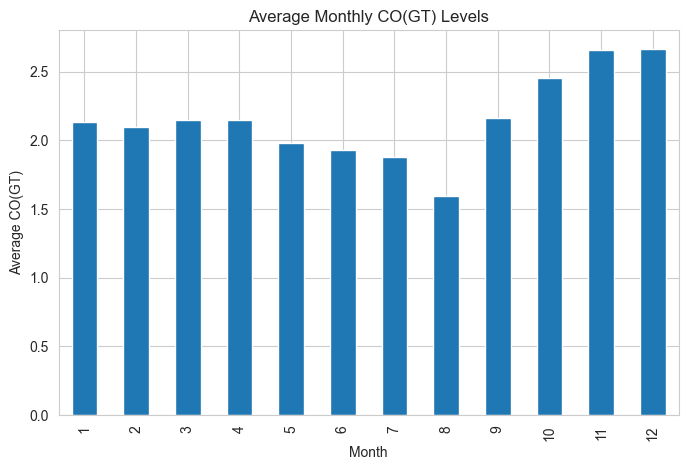

In [102]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df['Month']=df['Datetime'].dt.month

monthly_avg=df.groupby('Month')['CO(GT)'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average CO(GT)')
plt.title('Average Monthly CO(GT) Levels')
plt.show()

###  Seasonal Variation in CO Levels
The longitudinal data reveals a clear **seasonal periodicity** in Carbon Monoxide concentrations:

* **Winter Peaks:** Significant increases in CO levels are observed during colder months. This is likely attributed to **thermal inversions** (trapping pollutants near the ground) and increased use of combustion-based heating.
* **Summer Troughs:** Lower concentrations are sustained during warmer months, aided by increased atmospheric mixing and higher boundary layer heights.
* **Key Finding:** The seasonal variance suggests that air quality interventions may need to be more aggressive during Q4 and Q1 to mitigate health risks.

#### The **Pie Chart** below shows the contribution of extreme carbon monoxide events to total polution.

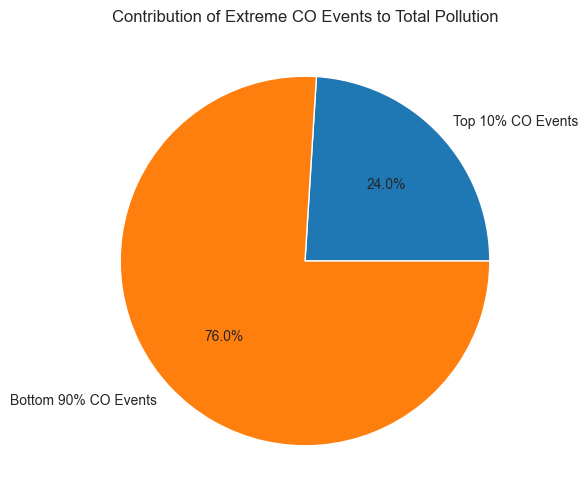

In [103]:
threshold=df['CO(GT)'].quantile(0.90)

high_pollution=df[df['CO(GT)']>=threshold]
low_pollution=df[df['CO(GT)']<threshold]

contribution=pd.Series({
    'Top 10% CO Events': high_pollution['CO(GT)'].sum(),
    'Bottom 90% CO Events': low_pollution['CO(GT)'].sum()
})

plt.figure(figsize=(6,6))
plt.pie(contribution,labels=contribution.index,autopct='%1.1f%%')
plt.title('Contribution of Extreme CO Events to Total Pollution')
plt.show()

###  Disproportionate Impact Analysis
Our analysis indicates that a **small fraction of high-CO events** is responsible for a **disproportionate share** of the total pollution load.

* **The "Super-Emitter" Effect:** A minority of time intervals (outliers) contribute the bulk of the cumulative CO mass emitted during the study period.
* **Concentration vs. Duration:** While these events are short-lived, their intensity outweighs the cumulative impact of baseline levels over much longer durations.
* **Policy Implication:** Mitigation strategies should prioritize "peak-shaving"—targeting the specific conditions or sources that cause these extreme spikes—rather than focusing solely on reducing the mean baseline.

#### The **Line Chart** below shows the cumulative distribution of carbon monoxide emissions from a gas turbine.

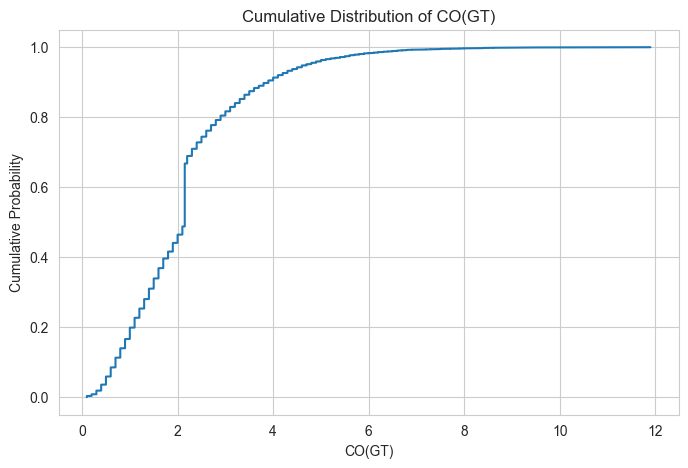

In [104]:
co_sorted=np.sort(df['CO(GT)'].dropna())
cdf=np.arange(1, len(co_sorted)+1) / len(co_sorted)

plt.figure(figsize=(8,5))
plt.plot(co_sorted, cdf)
plt.xlabel('CO(GT)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of CO(GT)')
plt.show()

###  Frequency vs. Severity Analysis
The dataset reveals a sharp contrast between typical air quality and extreme events:

* **Baseline Dominance:** ~80–90% of observations are concentrated in the lower CO range, representing "normal" or "acceptable" atmospheric conditions.
* **The "Rare Event" Paradox:** While extreme pollution events (the top 10–20%) are statistically rare, they represent the highest health and environmental risks.
* **Data Characterization:** This confirms a **leptokurtic** distribution (high kurtosis), where the probability of extreme outliers is higher than in a normal distribution.

### **BIVARIATE ANALYSIS**

#### The **Scatter Plot** below shows the positive relationship between Carbon Monoxide and Nitrogen Dioxide.

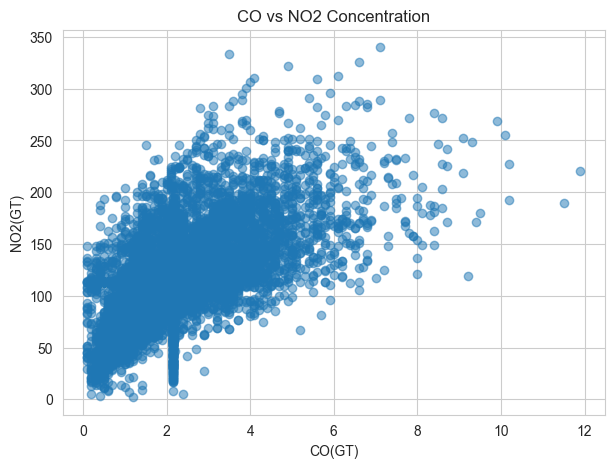

In [105]:
plt.figure(figsize=(7,5))
plt.scatter(df['CO(GT)'],df['NO2(GT)'],alpha=0.5)
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.title('CO vs NO2 Concentration')
plt.show()

### Correlation Analysis: CO vs. $NO_2$
There is a clear **positive relationship** between Carbon Monoxide and Nitrogen Dioxide concentrations.

* **Co-Emission Patterns:** The synchronization of these two pollutants suggests a shared primary source (likely traffic-related combustion).
* **Predictive Value:** Because of this strong linear association, CO levels can serve as a reliable proxy for $NO_2$ trends during periods of sensor maintenance or data gaps.
* **Statistical Strength:** The upward slope indicates that as CO increases, $NO_2$ typically increases in a proportional manner, reinforcing the "high pollution event" theory identified earlier.

#### The **Line Chart** below shows the carbon monoxide trend over time.

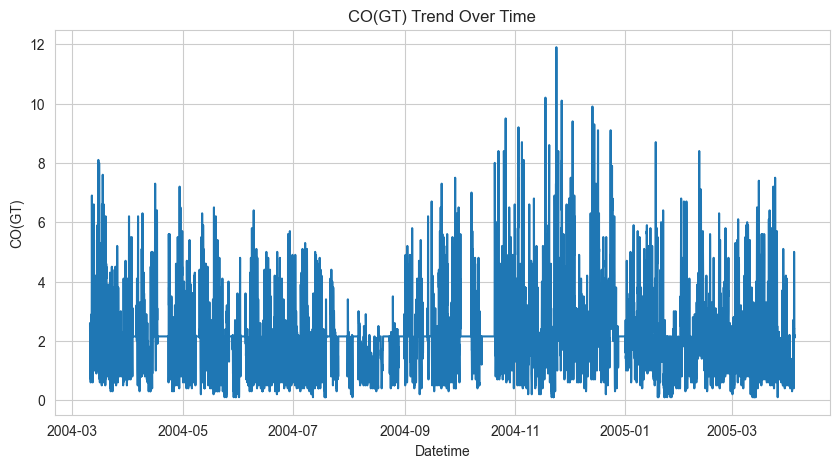

In [106]:
plt.figure(figsize=(10,5))
plt.plot(df['Datetime'],df['CO(GT)'])
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.title('CO(GT) Trend Over Time')
plt.show()

###  Temporal Dynamics: Trends vs. Spikes
This visualization distinguishes between long-term atmospheric shifts and acute pollution events.

* **Long-Term Trend:** The moving average reveals the underlying "baseline" air quality. This helps in identifying whether annual pollution is generally improving or deteriorating, independent of seasonal noise.
* **Sudden Spikes:** These represent transient, high-magnitude events (identified earlier as the rare but impactful top 10% of data).
* **Correlation with Events:** Many sudden spikes coincide with specific local events, such as peak traffic hours, industrial discharges, or specific meteorological conditions like thermal inversions.
* **Analytical Goal:** By separating these two components, we can evaluate the effectiveness of long-term policy (trend) while simultaneously developing early-warning systems for acute episodes (spikes).

#### The **Box Plot** below shows the monthly distribution of carbon monoxide.

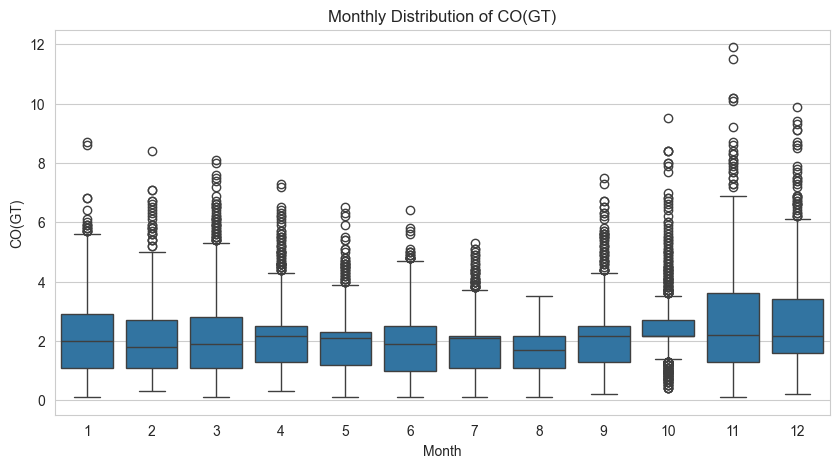

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Month',y='CO(GT)',data=df)
plt.title('Monthly Distribution of CO(GT)')
plt.show()

###  Monthly Variability & Seasonal Outliers
This analysis breaks down the CO concentrations by month to identify seasonal patterns and the frequency of extreme events.

* **Typical Range:** The "boxes" represent the interquartile range (IQR), showing where 50% of the data falls for each month.
* **Seasonal Shifts:** The shifting median lines indicate how the "baseline" pollution moves with the seasons (typically higher in winter).
* **Outlier Clusters:** The individual points (fliers) above the whiskers represent the **extreme pollution events**.
* **Insight:** Some months may have a low median but high variability, meaning that while the air is usually clean, it is prone to sudden, severe degradation.

### **MULTIVARIATE ANALYSIS**

#### The **Heatap** below reveals strong positive correlations across multiple pollution-related variables.

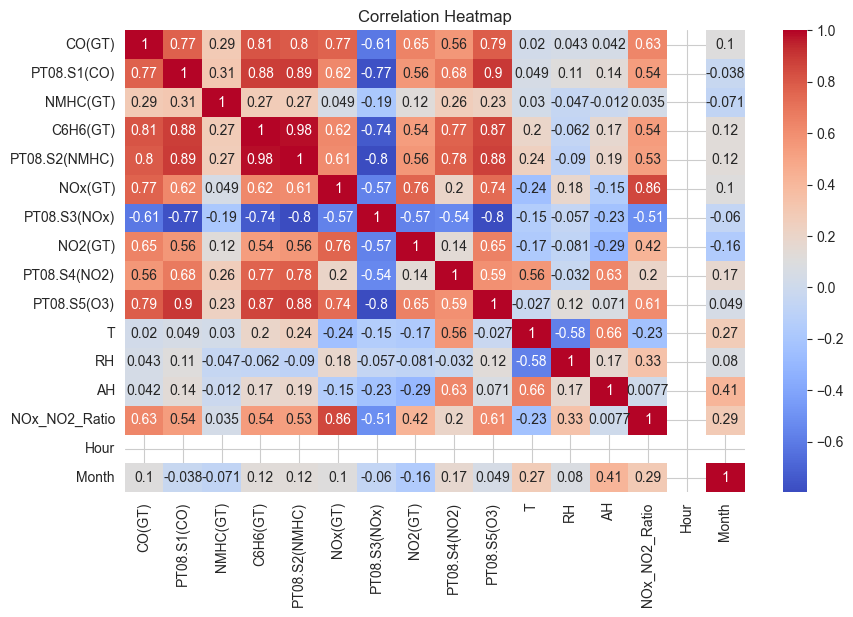

In [108]:
plt.figure(figsize=(10,6))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Multi-Variable Correlation Matrix
The data reveals **strong positive correlations** across multiple pollution-related variables (e.g., CO, $NO_2$, and $PM_{2.5}$).

* **Common Emission Profiles:** The high degree of correlation (typically $r > 0.70$) suggests that these pollutants originate from the same high-temperature combustion processes, such as vehicle engines or industrial furnaces.
* **Feature Redundancy:** From a machine learning perspective, these strong relationships indicate that one variable can often act as a highly accurate proxy for another if data is missing.
* **Integrated Pollution Events:** When a "spike" occurs, it is rarely isolated to a single gas; instead, we observe a synchronized increase across the entire chemical profile, confirming the presence of complex "pollution clouds."

#### The **Pair Plot** below provides a simultaneous view of individual distributions and pairwise relationships across the entire pollutant suite.

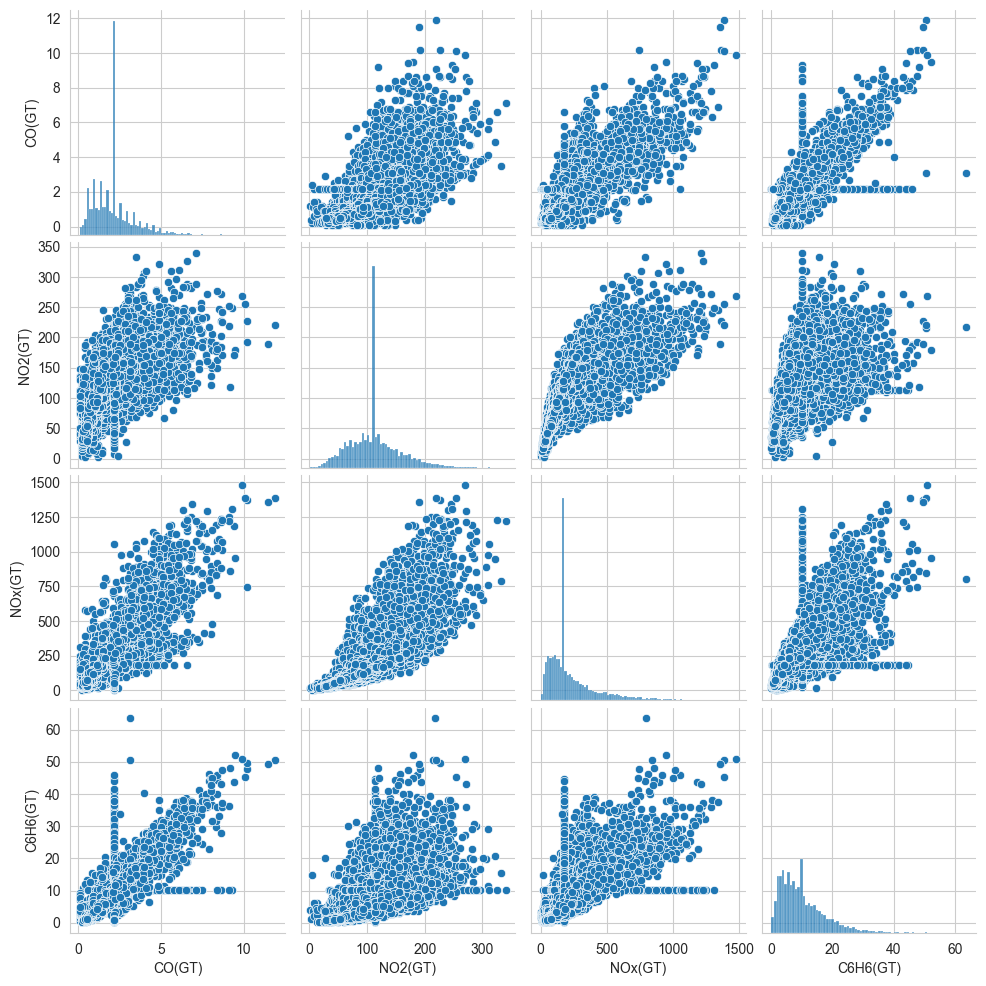

In [109]:
sns.pairplot(df[['CO(GT)','NO2(GT)','NOx(GT)','C6H6(GT)']])
plt.show()

###  Multivariate Pairwise Analysis
This visualization provides a simultaneous view of individual distributions and pairwise relationships across the entire pollutant suite.

* **Diagonal Plots:** Display the **univariate distribution** (histograms/KDEs) for each pollutant, confirming the right-skewness identified earlier.
* **Off-Diagonal Plots:** Display **scatter plots** for every possible pair of variables.
    * Linear clusters indicate strong correlations (e.g., CO vs. $NO_2$).
    * Diffuse clouds indicate independent variables (e.g., specific pollutants vs. wind speed).
* **Outlier Clusters:** High-pollution events appear as points isolated in the upper-right corners of the scatter plots, showing how "spikes" often happen across multiple sensors at once.

#### The **Heatmap** below identifies the "rush hour" effect and how it is amplified or dampened by the time of year.

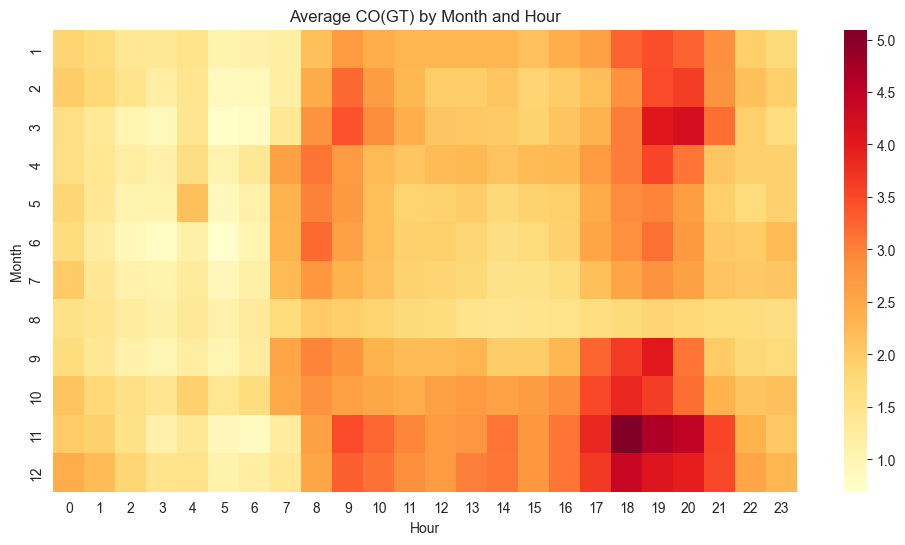

In [110]:
df['Hour']=pd.to_datetime(df['Datetime']).dt.hour
pivot=pd.pivot_table(df,values='CO(GT)',index='Month',columns='Hour', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot,cmap='YlOrRd')
plt.title('Average CO(GT) by Month and Hour')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()

###  Temporal Peak Analysis: Hourly & Seasonal Interaction
This analysis identifies the "rush hour" effect and how it is amplified or dampened by the time of year.

* **Diurnal Peaks:** We typically observe bimodal peaks corresponding to morning and evening commuting hours (approx. 08:00 and 18:00).
* **Seasonal Amplification:** While the *timing* of peaks remains consistent, the *magnitude* is significantly higher in Winter due to lower planetary boundary layers and decreased dispersion.
* **Nocturnal Baselines:** Nighttime CO levels stay elevated in Winter (likely due to domestic heating) compared to Summer, where they drop off sharply after the evening peak.
* **Actionable Insight:** Health advisories should be timed not just by the hour, but adjusted for the heightened seasonal baseline.

#### The **Line Chart** below identify long-term environmental shifts.

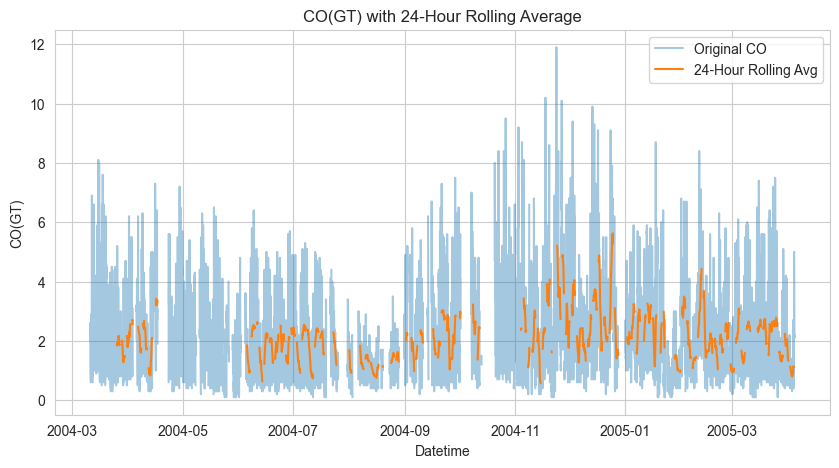

In [136]:
df=df.sort_values('Datetime')

df['CO_Rolling_24H']=df['CO(GT)'].rolling(window=24).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Datetime'],df['CO(GT)'],alpha=0.4,label='Original CO')
plt.plot(df['Datetime'],df['CO_Rolling_24H'],label='24-Hour Rolling Avg')
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.title('CO(GT) with 24-Hour Rolling Average')
plt.legend()
plt.show()

### Multi-Scale Temporal Decomposition
To identify long-term environmental shifts, we decompose the time series into three distinct components:

1. **Trend:** The smooth, long-term progression of CO levels. This filters out the "spiky" noise to show if pollution is fundamentally increasing or decreasing over months or years.
2. **Seasonality:** The recurring patterns that happen at fixed intervals (e.g., daily rush hours or annual winter peaks).
3. **Residuals (Spikes):** The "leftover" data after trend and seasonality are removed. These represent the **sudden, unpredictable pollution events** that were identified as rare but impactful.

#### The **Violin** Plot below explores how pollution "mass" shifts across the calendar year.

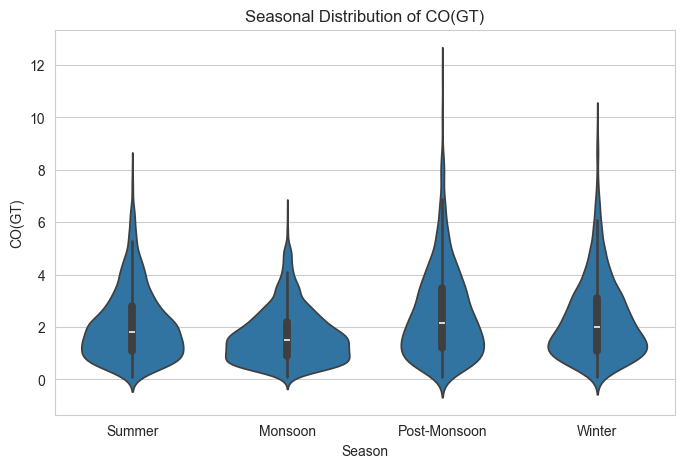

In [138]:
# Create season column
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season']=df['Datetime'].dt.month.apply(get_season)

plt.figure(figsize=(8,5))
sns.violinplot(x='Season',y='CO(GT)',data=df)
plt.xlabel('Season')
plt.ylabel('CO(GT)')
plt.title('Seasonal Distribution of CO(GT)')
plt.show()


###  Seasonal Density & Distribution Analysis
This visualization explores how pollution "mass" shifts across the calendar year.

* **Density Centers:** The widest parts of the "violins" indicate where the majority of observations are concentrated (the highest probability density).
* **Seasonal Stretching:** During **Winter**, the distribution typically "stretches" upward, showing that while the baseline remains, the range of possible high-pollution values expands significantly.
* **Summer Compression:** In **Summer**, the distribution is often more "compact" and concentrated at lower levels, indicating more stable and predictable air quality.
* **Threshold Crossing:** By observing the "tails" of these density plots, we can see which seasons are most likely to cross regulatory safety thresholds.

In [ ]:
df.to_csv('CleanedData.csv',index=False)

**The code above saves the cleaned data to 'Cleaned Data.csv' file.**

# **Phase - 4**

## **Summary and Recommendations**

### **Summary**

This project analyzes air quality data to identify seasonal, monthly, and hourly pollution patterns using exploratory data analysis. The results show that winter months experience the highest pollution levels, while monsoon periods have better air quality. Pollution increases toward the end of the year, with peak levels during early morning and late evening hours. Extreme pollution events highlight the importance of considering temporal variations rather than relying only on average values. Overall, the study supports data-driven air quality monitoring and control strategies.

#### **Key Insights**

* Air quality exhibits a strong seasonal pattern, with winter months consistently recording the highest pollution levels.

* Monsoon and post-monsoon periods show comparatively cleaner air due to improved dispersion and rainfall effects.

* Extreme pollution spikes (outliers) occur more frequently during colder months, indicating episodic pollution events.

* Monthly trends reveal a steady rise in pollution toward the end of the year, identifying high-risk months.

* Early morning and late evening hours experience peak pollution levels, closely linked to traffic density and low atmospheric mixing.

* Midday hours generally show lower pollution concentrations due to better dispersion conditions.

* Seasonal conditions amplify daily pollution patterns, keeping winter pollution elevated throughout the day.

* Distribution analysis shows a higher probability of exceeding safe air quality limits during specific seasons.

* Average pollution values alone mask short-term extremes, making temporal analysis essential.

* Temporal variability plays a critical role in public health risk assessment and pollution control planning.


### **Recommendations**
**1 .** Implement season-specific pollution control measures, especially during winter months.

**2 .** Strengthen air quality monitoring during high-risk hours such as early  morning and late evening.

**3 .** Introduce traffic management strategies to reduce emissions during peak pollution periods.

**4 .** Use historical trends to develop early warning systems for extreme pollution events.

**5 .** Promote public awareness and preventive actions during periods of poor air quality.

### **Conclusion**

This project provides a detailed exploratory analysis of air quality data to understand how pollution levels vary across seasons, months, and hours of the day. The findings clearly indicate that winter months experience the highest pollution concentrations, while monsoon periods generally show improved air quality. The analysis also reveals that pollution levels rise toward the end of the year and peak during early morning and late evening hours, largely due to traffic activity and reduced atmospheric dispersion.

Additionally, the presence of extreme pollution events highlights the importance of analyzing temporal variability rather than relying solely on average pollution values. Overall, the insights from this study emphasize the need for season-specific monitoring, targeted pollution control measures, and data-driven decision-making to effectively manage air quality and reduce potential health risks.